<a href="https://colab.research.google.com/github/michiWS1920/ADS20/blob/master/ADS_Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 2
**Getting and visualizing data**

In the second problem set you will leverage webscraping and API calls to collect interesting data-sets. Subsequently, you will plot the resulting data-sets using ```ggplot```.

To perform your analysis you have to load the library ```tidyverse```. Additionally, we use the ```jsonlite``` to perform API requests and ```rvest``` for webscraping. If you want to use additional libraries you can add them to the following cell:

In [1]:
library(tidyverse)
library(lubridate)
library(jsonlite)
library(rvest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




## Task 1
**COVID-19**

The free [COVID-19 API](https://covid19api.com) provides data sourced from Johns Hopkins CSSE. You can find a detailed documentation on the API and the allowed routes [here](https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest).

Your first task is to study the documentation and make an API call to request all available countries. How many countries are listed?

* 248 countries listed

In [6]:
url = 'https://api.covid19api.com/countries'
covid_test = fromJSON(url)
covid_test

,Country,Slug,ISO2
,<chr>,<chr>,<chr>
1,Singapore,singapore,SG
2,Tunisia,tunisia,TN
3,Cambodia,cambodia,KH
4,Haiti,haiti,HT
5,Ireland,ireland,IE
6,Luxembourg,luxembourg,LU
7,New Zealand,new-zealand,NZ
8,Philippines,philippines,PH
9,Turkmenistan,turkmenistan,TM


In [0]:
covid_test %>%
filter(Country == "United States of America")

Country,Slug,ISO2
<chr>,<chr>,<chr>
United States of America,united-states,US


Next, select 8 countries and retrieve the number of confirmed cases as well as the number of deaths and recovered patients since the first case was recorded in each of the 8 countries.

In [23]:
condition1 = "confirmed", "deaths", "recovered"

condition1

ERROR: ignored

In [35]:
base_url = "https://api.covid19api.com/total/dayone/country/"

brazil = fromJSON(paste0(base_url, "brazil"))
germany = fromJSON(paste0(base_url, "germany"))
Mexico = fromJSON(paste0(base_url, "mexico"))
turkey = fromJSON(paste0(base_url, "turkey"))
china = fromJSON(paste0(base_url, "china"))
sweden = fromJSON(paste0(base_url, "sweden")) 
spain = fromJSON(paste0(base_url, "spain"))
norway = fromJSON(paste0(base_url, "norway"))
bind_rows(brazil, germany, Mexico, turkey, china, sweden, spain, norway)

Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
Brazil,,,,,0,0,1,0,0,1,2020-02-26T00:00:00Z
Brazil,,,,,0,0,1,0,0,1,2020-02-27T00:00:00Z
Brazil,,,,,0,0,1,0,0,1,2020-02-28T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-02-29T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-03-01T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-03-02T00:00:00Z
Brazil,,,,,0,0,2,0,0,2,2020-03-03T00:00:00Z
Brazil,,,,,0,0,4,0,0,4,2020-03-04T00:00:00Z
Brazil,,,,,0,0,4,0,0,4,2020-03-05T00:00:00Z


Inspecting the resulting data-set you will find that some countries report cases on a country level while others report them on a province or even city level. Your next task is to aggregate the data on a country level. Subsequently, you should create a faceted plot showing the confirmed cases, as well as the number of deaths and the recovered patients.

Hint 1: You will have to reshape your data to a long format.<br>
Hint 2: You can try to recreate the following plot.

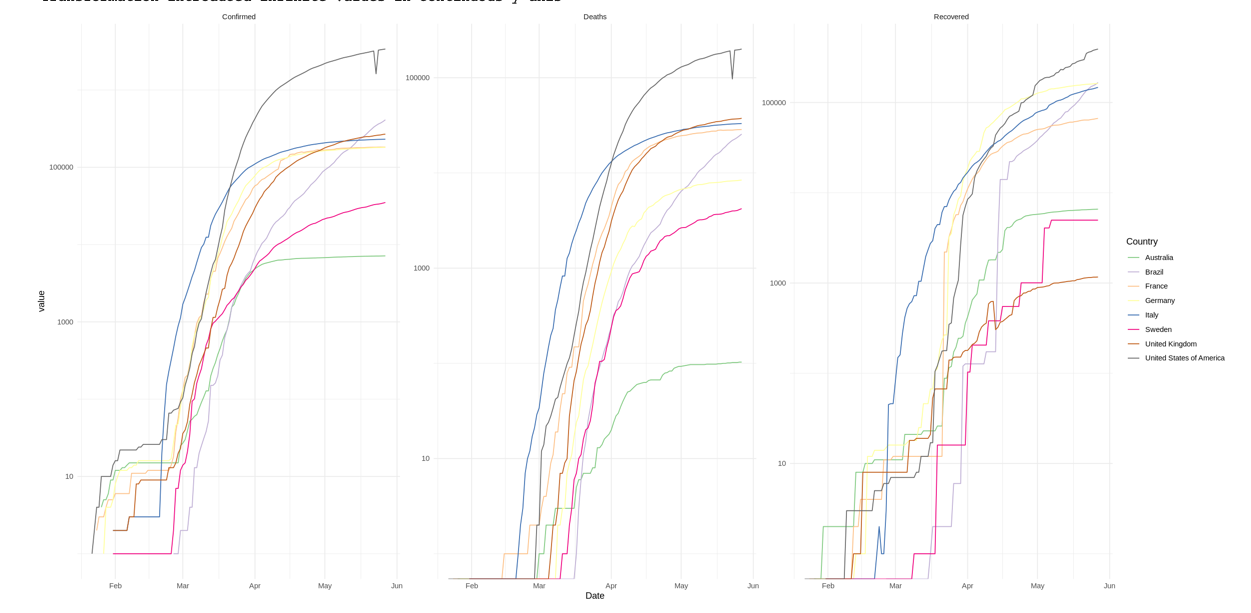

In [0]:
# Insert your code here

## Task 2
**Formula One Racing**

The Ergast Developer API provides data for the Formula One from the beginning of the world championships in 1950. You can find a detailed documentation of the API and its endpoints [here](http://ergast.com/mrd/).

Your first task is to familiarize yourself with the API by requesting a dataframe of all drivers. How many drivers have participated in the Formula One over the years?

Hint 1: You can add the query parameter ```.json``` to your request to modify the response format.<br>
Hint 2: You can add the query parameter ```?limit=1000``` to request longer lists.

In [0]:
# Insert your code here

In [0]:
# Insert your code here

Plot the number of drivers from the countries in the list ```nationalities``` as a bar chart.

In [0]:
# Insert your code here

In [0]:
# Insert your code here

In order to perform more complex analysis we need additional API requests. However, these requests sometimes lead to complex responses (depending on the API) that are not easy to handle. Fortunately, R has a big community that often provides wrappers for many APIs in the form of libraries. For the following analysis you can either try to figure out your own requests or use the library ```formula1data```. You can use the following code to install it:

In [0]:
install.packages("devtools")
library(devtools)
install_github("arkraieski/formula1data")
library(formula1data)

Your next task is to visualize the standings during the season 2018. To this end you have to download the standings after each race in the year 2018. 

Hint 1: There have been 21 races in the year 2018<br>
Hint 2: You can use map to apply the download function for each race<br>
Hint 3: You can use a download function similar to ```resultGetter = function(x){getF1StandingsAfterRace(2018, x)}```

In [0]:
# Insert your code here

Use the resulting dataframe to plot the development of the standings during the season. 

Hint 1: You will have to join the race data and the driver data from the previous part of the task.<br>
Hint 2: You can try to recreate the following plot. However, we are happy if you have different ideas.

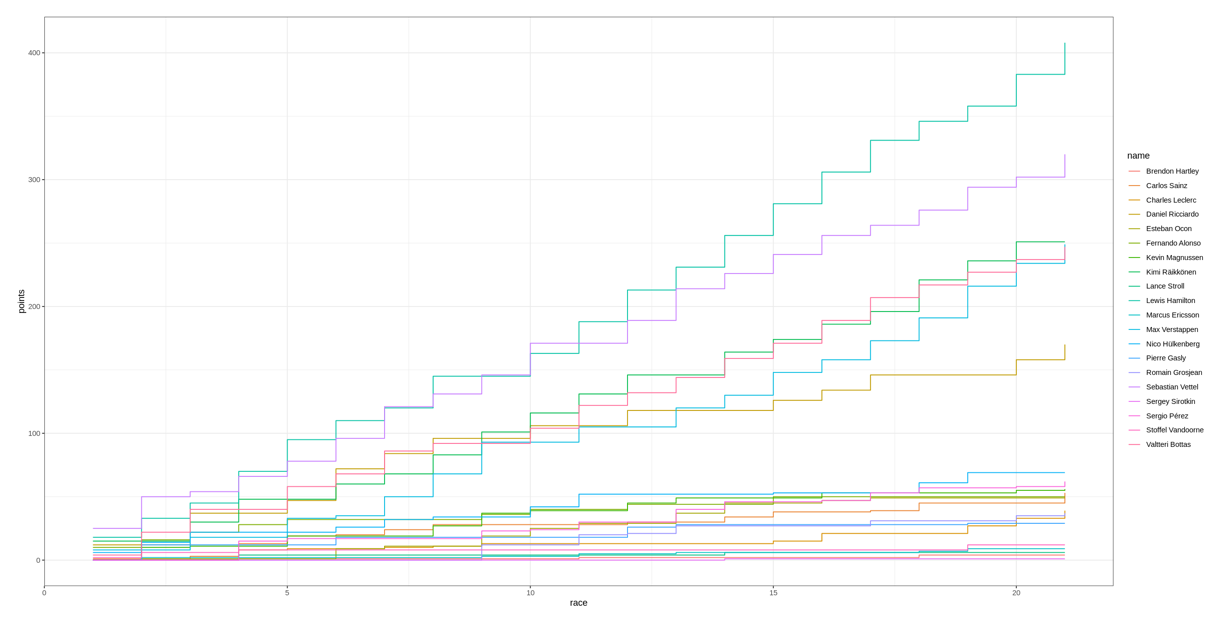

In [0]:
# Insert your code here

For the final analysis you should request the final standings for all Formular One seasons since 1950. Subsequently, you should identify all drivers that won at least 3 championships and visualize them using a column plot.  

Hint 1: You can try to recreate the following plot. However, we are happy if you have different ideas.<br>
Hint 2: You can use map to apply the download function for each season

![image.png](attachment:image.png)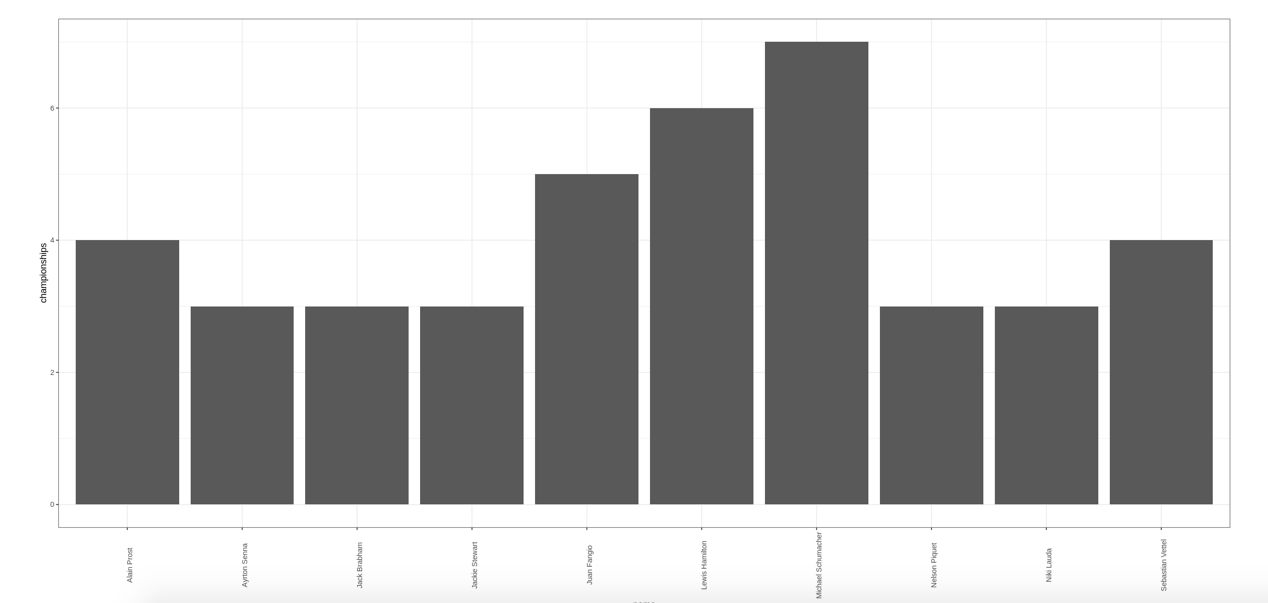

In [0]:
# Insert your code here

## Task 3
**Buying a new car**

You are planning to buy a new (used) car and this time want to do it in a data science fashion. Pick a vehicle of your choice (you should not opt for a too obscure make to find sufficient data), go to a used car website of your choice (e.g., autoscout24) and retrieve at least 1,000 vehicles offers. To minimize the number of calls to the website you should avoid scraping from the individual offer site but rather extract as much information as possible from the overview site. 

Hint 1: You may not have to extract the navigation links but can simply increment the page counter of the results url

In [0]:
# Insert your code here

Having scraped the data you will probably find that many columns are not well formated for further analysis (e.g., the price can contain € or \$ signs, , the milage km or miles and so on.  
Use regular expressions and the ```stringr``` package to clear the strings. 

Hint: You can use the [stringr cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/strings.pdf) to look for available regular expressions.

In [0]:
# Insert your code here

Finally, you should create at least two visualizations. Descripe and explain the plots to get a deeper understanding of the market.

In [0]:
# Insert your code here